# Findings
Putting aside usecase requests and perceived expectations, "#workflow" is the most mentioned hashtag (20 occurrences) and #discoverability is the second (6 occurrences).  Paintpoints are third but when combined with "#pain" they are second (10 occurrences).  Putting this together alongside the commentary in the videos, we can infer that there is a #painpoint due to #discoverability of the #workflow.  These are the high-level findings;

* button to launch the ad hoc workflow is hard to find (and poorly understood). 
* Discoverability of the add-from-search affordance was also poor.  
* People want to see ad hoc analysis side-by-side with their displays.
* People prefer direct manipulation like drag and drop for adding data to ad hoc.
* People don't understand the toggle function between ad hoc and display.

## Recommendations

* Ad hoc workspace should be capable of being displayed at the same time as display(s). (similar to PiV4 scratchpad)
* Buttons that are part of the workflow should have prominent styling and placement. 
* Adding data to ad hoc should use direct manipulation (i.e. drag and drop).
* All data should have context menu add option
* For desktop, add hover states to all symbols and list items (i.e. attributes in search); this will tell users "this object is selectable". 
* Change 

In [86]:
# Import libraries
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim
import re
import numpy

In [87]:
# User-Entered Parameters
textfile = "review_notes.csv"
textcolumn = "Note"
lowercase = True 
strip_non_alpha = True
remove_stopwords = True
use_default_stopwords = True
user_defined_stopwords = ["ad", "hoc", "want", "able", "#"]
lemmatize_stem_algorithm = "wordnet" #other options are "porter" and "none"
number_top_words = 20
number_topics = 5

In [88]:
# Read file and create pandas dataframe
df = pd.read_csv(textfile,header=0)
df["Note"]

0      electrical engineer and Pi Admin at Springervi...
1      #expectation. User expects to ctrl+click to mu...
2      #discoverability User searched for a button to...
3      #discoverability user looking for tooltip on h...
4      #expectation Workflow from selection to ad hoc...
5      #workflow #discoverability User tries to/expec...
6      #comprehension Confused about click on attribu...
7      #expectation User notices checkmark on "add to...
8      #expectation User opens ad hoc from search via...
9      #expectation: expects to be able to show/hide ...
10     #usecase would like to see min, max, avg on ho...
11     #expectation #usecase expects to be able to ad...
12     #expectation #usecase wants to be able to sele...
13     #expectation expects "add to ad hoc" context m...
14     #discoverability toggling between ad hoc and d...
15     #expectation #use case: wants to be able to ha...
16     #usecase it would be nice to work with 2-3 ad ...
17     #usecase in the case of 

In [89]:
# Create list of text column values
doc = pd.Series.tolist(df[textcolumn])

#print(doc)

In [90]:
# Create sentence and word tokens using NLTK tokenizers
import nltk
nltk.download('punkt')

sentences = [sent_tokenize(i) for i in doc]
tokenized_sentences = [word_tokenize(i) for i in doc]
words= []
for s in sentences:
    for i in s:
        words += word_tokenize(i)  
        
#print("Some tokenized sentences:",tokenized_sentences[:2])
#print("\nSome sentences:",sentences[:2])
#print("\nSome words:",words[:5])
counts = Counter(words)
counts.most_common(10) 

[nltk_data] Downloading package punkt to /Users/zac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('.', 125),
 ('#', 118),
 ('to', 113),
 ('ad', 46),
 ('hoc', 46),
 ('the', 46),
 ('She', 40),
 ('workflow', 33),
 ('usecase', 32),
 ('be', 29)]

In [91]:
# Lowercase word tokens
if lowercase == True:
    words = [w.lower() for w in words]
    tokenized_sentences = [[w.lower() for w in s] for s in tokenized_sentences]
    
#print(words)
#print(tokenized_sentences)
#counts = Counter(words)
#counts.most_common(10) 

In [92]:
# Strip non-alphabetic tokens
if strip_non_alpha == True:
    words = [w for w in words if w.isalpha()]
    tokenized_sentences = [[w for w in s if w.isalpha()] for s in tokenized_sentences]
    
#print(words)
#print(tokenized_sentences)
#counts = Counter(words)
#counts.most_common(10) 

In [93]:
# Remove stopwords from tokens
import nltk
nltk.download('stopwords')

if use_default_stopwords == True:
    stopwords_all = stopwords.words('english')+user_defined_stopwords
    stopwords_all = [sw for sw in stopwords_all if sw not in ["not","no"]] #modification to keep in negatives
else:
    stopwords_all = user_defined_stopwords    

if remove_stopwords == True:
    words = [w for w in words if w not in stopwords_all]
    tokenized_sentences = [[w for w in s if w not in stopwords_all] for s in tokenized_sentences]
      
#print(stopwords.words('english'))
#print(stopwords_all)
#print(words)
#print(tokenized_sentences)
#counts = Counter(words)
#counts.most_common(10) 

[nltk_data] Downloading package stopwords to /Users/zac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
# Stem/lemmatize word tokens
import nltk
nltk.download('wordnet')

if lemmatize_stem_algorithm == "wordnet":
    wordnet_lemmatizer = WordNetLemmatizer() 
    words = [wordnet_lemmatizer.lemmatize(w) for w in words]
    tokenized_sentences = [[wordnet_lemmatizer.lemmatize(w) for w in s] for s in tokenized_sentences]
elif lemmatize_stem_algorithm == "porter":
    porter = PorterStemmer() 
    words = [porter.stem(w) for w in words]
    tokenized_sentences = [[porter.stem(w) for w in s] for s in tokenized_sentences]
else:
    words = words
    
#print(words)
#print(tokenized_sentences)
#counts = Counter(words)
counts.most_common(10) 

[nltk_data] Downloading package wordnet to /Users/zac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[('.', 125),
 ('#', 118),
 ('to', 113),
 ('ad', 46),
 ('hoc', 46),
 ('the', 46),
 ('She', 40),
 ('workflow', 33),
 ('usecase', 32),
 ('be', 29)]

In [95]:
# Create Unsupervised Topic Models using Gensim
dictionary = corpora.Dictionary(tokenized_sentences)
doc_term_matrix = [dictionary.doc2bow(s) for s in tokenized_sentences]
model= LdaModel(doc_term_matrix, num_topics=number_topics, id2word = dictionary)

#print(dictionary)

In [96]:
# Top Words List
counts = Counter(words) #count words
counts.most_common(number_top_words) #display most common

[('workflow', 34),
 ('usecase', 32),
 ('expectation', 22),
 ('want', 22),
 ('trend', 21),
 ('display', 18),
 ('see', 17),
 ('time', 17),
 ('not', 17),
 ('search', 15),
 ('data', 15),
 ('would', 13),
 ('discoverability', 12),
 ('user', 9),
 ('add', 9),
 ('open', 9),
 ('multiple', 9),
 ('change', 8),
 ('use', 8),
 ('analysis', 8)]

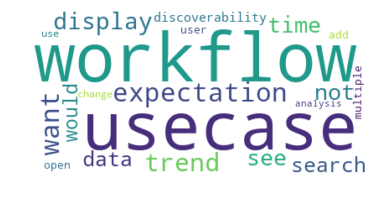

In [97]:
# Top Words Cloud - NOTES
wordcloud = WordCloud(background_color="white",max_words=number_top_words)
wordcloud.fit_words(counts)

plt.figure()
plt.axis("off")
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

In [98]:
# Extract hashtags and dedup
hashtags = str(df)
hashtagsUnique = re.findall(r"#(\w+)", hashtags)
numpy.unique(hashtagsUnique)

array(['VALUE', 'comment', 'comprehension', 'discoverability',
       'expectation', 'pain', 'painpoint', 'use', 'usecase', 'workflow'],
      dtype='<U15')

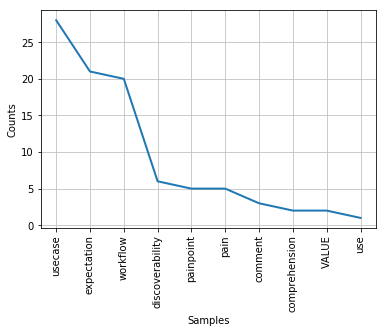

In [99]:
fd = nltk.FreqDist(hashtagsUnique)
fd.plot(10,cumulative=False)

In [100]:
# Topic Model Visualization
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, doc_term_matrix, dictionary)

/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.006199  0.102782       1        1  26.429037
1     -0.105760 -0.052068       2        1  22.021856
3      0.104932 -0.059538       3        1  21.957817
4      0.008553  0.010072       4        1  16.950354
0     -0.013924 -0.001249       5        1  12.640932, topic_info=     Category       Freq             Term      Total  loglift  logprob
term                                                                  
7     Default  16.000000      expectation  16.000000  30.0000  30.0000
73    Default  12.000000             time  12.000000  29.0000  29.0000
220   Default   6.000000               us   6.000000  28.0000  28.0000
310   Default   2.000000              two   2.000000  27.0000  27.0000
217   Default   3.000000         happened   3.000000  26.0000  26.0000
59    Default  23.000000          usecase  23.000000  25.0000  25.0000
80    Default   7.000000         multiple   7.000000  24.0000  24.0000
39    Default  11.000000           search  11.000000  23.0000  23.0000
306   Default   3.000000            value   3.000000  22.0000  22.0000
272   Default   6.000000            trace   6.000000  21.0000  21.0000
27    Default   4.000000         expected   4.000000  20.0000  20.0000
183   Default   3.000000         operator   3.000000  19.0000  19.0000
60    Default  10.000000            would  10.000000  18.0000  18.0000
34    Default   6.000000           change   6.000000  17.0000  17.0000
213   Default   4.000000             find   4.000000  16.0000  16.0000
46    Default   7.000000             open   7.000000  15.0000  15.0000
20    Default   1.000000               ca   1.000000  14.0000  14.0000
31    Default  13.000000          display  13.000000  13.0000  13.0000
151   Default   4.000000           cursor   4.000000  12.0000  12.0000
12    Default   4.000000           button   4.000000  11.0000  11.0000
66    Default  16.000000             want  16.000000  10.0000  10.0000
11    Default   7.000000             user   7.000000   9.0000   9.0000
8     Default   4.000000          expects   4.000000   8.0000   8.0000
53    Default   5.000000             like   5.000000   7.0000   7.0000
77    Default   2.000000            frame   2.000000   6.0000   6.0000
141   Default   4.000000             axis   4.000000   5.0000   5.0000
4     Default   5.000000               pi   5.000000   4.0000   4.0000
131   Default   4.000000              tag   4.000000   3.0000   3.0000
19    Default   2.000000             view   2.000000   2.0000   2.0000
65    Default   2.000000              box   2.000000   1.0000   1.0000
...       ...        ...              ...        ...      ...      ...
222    Topic5   0.757901          calling   1.344594   1.4949  -5.0506
290    Topic5   0.757646           switch   1.344641   1.4946  -5.0509
9      Topic5   0.756725            multi   1.344784   1.4932  -5.0521
306    Topic5   1.628117            value   3.370351   1.3406  -4.2860
183    Topic5   1.390337         operator   3.518511   1.1397  -4.4438
220    Topic5   2.023841               us   6.192798   0.9498  -4.0684
80     Topic5   2.025822         multiple   7.037673   0.8229  -4.0674
58     Topic5   2.656415              see  12.811423   0.4949  -3.7964
141    Topic5   1.391750             axis   4.198434   0.9641  -4.4428
59     Topic5   3.323799          usecase  23.741661   0.1021  -3.5723
8      Topic5   1.391003          expects   4.940156   0.8009  -4.4434
151    Topic5   1.393068           cursor   4.999287   0.7904  -4.4419
73     Topic5   2.092687             time  12.798542   0.2573  -4.0349
29     Topic5   2.371142         workflow  25.314608  -0.2998  -3.9100
11     Topic5   1.391130             user   7.030087   0.4481  -4.4433
66     Topic5   1.494470             want  16.756239  -0.3488  -4.3716
7      Topic5   1.460301      expectation  16.331736  -0.3462  -4.3947
74     Topic5   1.447320     